In [16]:
import pandas as pd
import numpy as np
from pycaret.classification import *


In [17]:
btcData = pd.read_excel('Gemini_BTCUSD_1h.xlsx')
btcData.head(5)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,SMA_7,...,H-PC,L-PC,TR,ATR,close_%,high_%,low_%,open_%,volume_btc_%,volume_usd_%
0,1487746800,2017-02-22 07:00:00,BTC/USD,1112.65,1112.65,1112.64,1112.65,6.842636,7613.459048,NaN,...,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1487750400,2017-02-22 08:00:00,BTC/USD,1112.65,1112.65,1111.67,1111.70,72.034206,80080.426510,NaN,...,0.00,0.98,0.98,NaN,-0.000854,0.000000,-0.000872,0.000000,9.527259,9.518271
2,1487754000,2017-02-22 09:00:00,BTC/USD,1111.70,1111.70,1111.64,1111.65,6.190303,6881.450419,NaN,...,0.00,0.06,0.06,NaN,-0.000045,-0.000854,-0.000027,-0.000854,-0.914064,-0.914068
3,1487757600,2017-02-22 10:00:00,BTC/USD,1111.65,1113.12,1111.65,1113.12,5.975156,6651.065563,NaN,...,1.47,0.00,1.47,NaN,0.001322,0.001277,0.000009,-0.000045,-0.034756,-0.033479
4,1487761200,2017-02-22 11:00:00,BTC/USD,1113.12,1118.49,1113.12,1115.51,44.767128,49938.179067,NaN,...,5.37,0.00,5.37,NaN,0.002147,0.004824,0.001322,0.001322,6.492211,6.508298


In [18]:
# create new column called direction just checks the close_%. if it is positive, then it is 1, else 0
btcData['direction'] = np.where(btcData['close_%'] > 0, 1, 0)

In [19]:
# shift the close % change by 1 hour
btcData['close_%'] = btcData['close_%'].shift(1)

btcData.head()


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,SMA_7,...,L-PC,TR,ATR,close_%,high_%,low_%,open_%,volume_btc_%,volume_usd_%,direction
0,1487746800,2017-02-22 07:00:00,BTC/USD,1112.65,1112.65,1112.64,1112.65,6.842636,7613.459048,NaN,...,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1487750400,2017-02-22 08:00:00,BTC/USD,1112.65,1112.65,1111.67,1111.70,72.034206,80080.426510,NaN,...,0.98,0.98,NaN,NaN,0.000000,-0.000872,0.000000,9.527259,9.518271,0
2,1487754000,2017-02-22 09:00:00,BTC/USD,1111.70,1111.70,1111.64,1111.65,6.190303,6881.450419,NaN,...,0.06,0.06,NaN,-0.000854,-0.000854,-0.000027,-0.000854,-0.914064,-0.914068,0
3,1487757600,2017-02-22 10:00:00,BTC/USD,1111.65,1113.12,1111.65,1113.12,5.975156,6651.065563,NaN,...,0.00,1.47,NaN,-0.000045,0.001277,0.000009,-0.000045,-0.034756,-0.033479,1
4,1487761200,2017-02-22 11:00:00,BTC/USD,1113.12,1118.49,1113.12,1115.51,44.767128,49938.179067,NaN,...,0.00,5.37,NaN,0.001322,0.004824,0.001322,0.001322,6.492211,6.508298,1


In [20]:
btcData['high_%'] = btcData['high_%'].shift(1)
btcData['low_%'] = btcData['low_%'].shift(1)
btcData['open_%'] = btcData['open_%'].shift(1)
btcData['volume_btc_%'] = btcData['volume_btc_%'].shift(1)
btcData['volume_usd_%'] = btcData['volume_usd_%'].shift(1)

In [21]:
btcData01 = btcData.drop(['symbol', 'open', 'high', 'low', 'Volume BTC', 'Volume USD'], axis=1)

In [22]:
btcData01['SMA_7'] = btcData01['SMA_7'].shift(1)
btcData01['SMA_14'] = btcData01['SMA_14'].shift(1)
btcData01['EMA_7'] = btcData01['EMA_7'].shift(1)
btcData01['EMA_14'] = btcData01['EMA_14'].shift(1)
btcData01['EMA_12'] = btcData01['EMA_12'].shift(1)
btcData01['EMA_26'] = btcData01['EMA_26'].shift(1)
btcData01['MACD'] = btcData01['MACD'].shift(1)
btcData01['RSI'] = btcData01['RSI'].shift(1)
btcData01['Signal'] = btcData01['Signal'].shift(1)
btcData01['Upper Band'] = btcData01['Upper Band'].shift(1)
btcData01['Lower Band'] = btcData01['Lower Band'].shift(1)
btcData01['ATR'] = btcData01['ATR'].shift(1)


In [23]:
btcData01 = btcData01.dropna()

In [24]:
#split the data into training and testing, since it is time series data, we will use the last 10% of the data for testing
btcData01.set_index('date', inplace=True)
btcData01.index = pd.to_datetime(btcData01.index)

#sort the data in ascending order
btcData01.sort_index(inplace=True)

# get train data from 2023-01-01 to 2024-01-01
train = btcData01[(btcData01.index >= '2023-01-01') & (btcData01.index < '2024-01-01')]

# the test data is from 2024-01-02 to 2024-01-016
test = btcData01[(btcData01.index >= '2024-01-01') & (btcData01.index < '2024-01-15')]

train.shape, test.shape


((8746, 28), (336, 28))

In [17]:
dt_data = train[['SMA_7', 'SMA_14', 'EMA_7', 'EMA_14', 'MACD', 'RSI', 'Signal','Upper Band', 'Lower Band', 'ATR', 'close_%', 'high_%', 'low_%', 'open_%', 'volume_btc_%', 'volume_usd_%', 'direction']]
dt_test = test[['SMA_7', 'SMA_14', 'EMA_7', 'EMA_14', 'MACD', 'RSI', 'Signal','Upper Band', 'Lower Band', 'ATR', 'close_%', 'high_%', 'low_%', 'open_%', 'volume_btc_%', 'volume_usd_%', 'direction']]
dt_data.head(5)

,SMA_7,SMA_14,EMA_7,EMA_14,MACD,RSI,Signal,Upper Band,Lower Band,ATR,close_%,high_%,low_%,open_%,volume_btc_%,volume_usd_%,direction
date,,,,,,,,,,,,,,,,,
2017-02-23 03:00:00,1132.157143,1131.022143,1131.575516,1129.226468,4.794143,68.191866,4.739647,1143.882747,1107.657253,4.271071,0.000026,0.000530,0.002575,0.002575,-0.746826,-0.746819,0
2017-02-23 04:00:00,1130.585714,1131.435714,1130.631637,1129.036272,4.264244,56.460611,4.644566,1143.565233,1109.489767,4.308214,-0.004519,-0.000714,-0.005967,0.000026,3.141940,3.123222,1
2017-02-23 05:00:00,1129.997143,1131.622857,1130.221228,1129.030102,3.895414,53.146013,4.494736,1142.952493,1111.831507,4.239643,0.001055,-0.002675,0.000320,-0.004519,-0.625510,-0.625114,1
2017-02-23 06:00:00,1130.210000,1131.600000,1130.253421,1129.206089,3.670543,49.586563,4.329897,1142.042663,1114.611337,4.097500,0.001205,0.000841,0.001811,0.001055,0.031711,0.032954,1
2017-02-23 07:00:00,1130.545714,1131.910714,1130.412566,1129.430610,3.495609,56.194816,4.163039,1140.941267,1117.489733,3.909643,0.000478,0.000707,0.001427,0.001205,-0.243185,-0.242823,0


In [18]:
#rename to get rid of % from column names
dt_data.columns = ['SMA_7', 'SMA_14', 'EMA_7', 'EMA_14', 'MACD', 'RSI', 'Signal','Upper Band', 'Lower Band', 'ATR', 'close_percentage', 'high_percentage', 'low_percentage', 'open_percentage', 'volume_btc_percentage', 'volume_usd_percentage', 'target']
dt_test.columns = ['SMA_7', 'SMA_14', 'EMA_7', 'EMA_14', 'MACD', 'RSI', 'Signal','Upper Band', 'Lower Band', 'ATR', 'close_percentage', 'high_percentage', 'low_percentage', 'open_percentage', 'volume_btc_percentage', 'volume_usd_percentage', 'target']

In [19]:
infinite_values = dt_data.isin([np.inf, -np.inf]).sum()
print('Infinite values in the dataset: ', infinite_values.sum())

Infinite values in the dataset:  220


In [20]:
dt_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [22]:
classification_setup = setup(data = dt_data, target = 'target', train_size = 0.8, session_id = 101, index=False)

,Description,Value
0,Session id,101
1,Target,target
2,Target type,Binary
3,Original data shape,"(58827, 17)"
4,Transformed data shape,"(58827, 17)"
5,Transformed train set shape,"(47061, 17)"
6,Transformed test set shape,"(11766, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [23]:
dt_model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5267,0.5369,0.7608,0.5253,0.6215,0.0435,0.0491
1,0.5255,0.5351,0.7936,0.5233,0.6307,0.0398,0.0471
2,0.5263,0.5431,0.7965,0.5238,0.6320,0.0414,0.0492
3,0.5338,0.5410,0.7283,0.5318,0.6147,0.0596,0.0645
4,0.5276,0.5288,0.7807,0.5252,0.6279,0.0447,0.0517
5,0.5168,0.5276,0.7258,0.5192,0.6053,0.0247,0.0271
6,0.5317,0.5381,0.7824,0.5279,0.6304,0.0530,0.0611
7,0.5380,0.5514,0.7262,0.5351,0.6162,0.0684,0.0736
8,0.5246,0.5429,0.7886,0.5229,0.6288,0.0383,0.0450


In [24]:
dt_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [25]:
dt_test.fillna(dt_test.mean(), inplace=True)

In [26]:
predictions = predict_model(dt_model, data = dt_test)

print(predictions)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5417,0.5438,0.5325,0.5455,0.5389,0.0834,0.0835


            SMA_7        SMA_14         EMA_7        EMA_14        MACD  \
0    42486.945312  42502.613281  42423.378906  42448.535156   35.257027   
1    42467.554688  42487.378906  42433.699219  42450.683594   33.887642   
2    42462.941406  42493.812500  42477.414062  42471.734375   43.906982   
3    42459.460938  42504.546875  42500.062500  42484.570312   48.023365   
4    42430.156250  42494.433594  42458.332031  42464.378906   31.963514   
..            ...           ...           ...           ...         ...   
331  42858.519531  42884.140625  42885.246094  42870.835938  -52.372898   
332  42848.589844  42875.058594  42820.859375  42838.417969  -68.039124   
333  42795.191406  42841.878906  42739.308594  42792.582031  -90.151535   
334  42754.667969  42807.304688  42681.417969  42754.601562 -105.403694   
335  42663.980469  42755.042969  42574.703125  42687.929688 -136.350494   

           RSI     Signal    Upper Band    Lower Band         ATR  \
0    28.459555  71.300537  427

In [27]:
predictions

,SMA_7,SMA_14,EMA_7,EMA_14,MACD,RSI,Signal,Upper Band,Lower Band,ATR,close_percentage,high_percentage,low_percentage,open_percentage,volume_btc_percentage,volume_usd_percentage,target,prediction_label,prediction_score
0,42486.945312,42502.613281,42423.378906,42448.535156,35.257027,28.459555,71.300537,42787.136719,42152.414062,191.050720,0.000312,-0.005127,-0.001083,-0.005713,0.149508,0.149867,1,1,0.5210
1,42467.554688,42487.378906,42433.699219,42450.683594,33.887642,41.036873,63.817959,42774.832031,42190.625000,201.777145,0.004524,0.004269,0.004170,0.000312,0.983559,0.992532,1,1,0.5100
2,42462.941406,42493.812500,42477.414062,42471.734375,43.906982,53.834621,59.835762,42766.105469,42241.109375,214.106430,0.003388,0.005232,0.003734,0.004524,-0.021392,-0.018076,0,0,0.5081
3,42459.460938,42504.546875,42500.062500,42484.570312,48.023365,56.747803,57.473282,42753.500000,42285.976562,206.671432,-0.000951,-0.003057,0.001962,0.003388,-0.812884,-0.813062,0,0,0.5161
4,42430.156250,42494.433594,42458.332031,42464.378906,31.963514,44.517738,52.371330,42758.347656,42262.015625,221.222855,-0.005518,-0.000725,-0.005716,-0.000951,2.438511,2.419538,1,0,0.5030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,42858.519531,42884.140625,42885.246094,42870.835938,-52.372898,61.922611,-90.959557,43082.558594,42589.730469,163.000000,-0.001774,-0.000224,-0.001633,0.000866,1.908489,1.903330,0,0,0.5212
332,42848.589844,42875.058594,42820.859375,42838.417969,-68.039124,45.375099,-86.375473,43088.136719,42561.703125,169.405716,-0.005945,-0.001646,-0.004026,-0.001774,-0.094037,-0.099423,0,0,0.5029
333,42795.191406,42841.878906,42739.308594,42792.582031,-90.151535,32.174980,-87.130684,43111.882812,42518.257812,190.704285,-0.003121,-0.004572,-0.010033,-0.005945,2.496271,2.485358,1,1,0.5152
334,42754.667969,42807.304688,42681.417969,42754.601562,-105.403694,31.141844,-90.785286,43128.066406,42473.812500,221.692139,0.000308,-0.003968,-0.005674,-0.003121,0.253512,0.253899,0,1,0.5206


In [29]:
predictions['close_price'] = test['close']

In [30]:
predictions.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

predictions['close_price'] = test['close']


In [31]:
predictions.head(10)

,SMA_7,SMA_14,EMA_7,EMA_14,MACD,RSI,Signal,Upper Band,Lower Band,ATR,close_percentage,high_percentage,low_percentage,open_percentage,volume_btc_percentage,volume_usd_percentage,target,prediction_label,prediction_score,close_price
0,42486.945312,42502.613281,42423.378906,42448.535156,35.257027,28.459555,71.300537,42787.136719,42152.414062,191.050720,0.000312,-0.005127,-0.001083,-0.005713,0.149508,0.149867,1,1,0.5210,42464.66
1,42467.554688,42487.378906,42433.699219,42450.683594,33.887642,41.036873,63.817959,42774.832031,42190.625000,201.777145,0.004524,0.004269,0.004170,0.000312,0.983559,0.992532,1,1,0.5100,42608.55
2,42462.941406,42493.812500,42477.414062,42471.734375,43.906982,53.834621,59.835762,42766.105469,42241.109375,214.106430,0.003388,0.005232,0.003734,0.004524,-0.021392,-0.018076,0,0,0.5081,42568.02
3,42459.460938,42504.546875,42500.062500,42484.570312,48.023365,56.747803,57.473282,42753.500000,42285.976562,206.671432,-0.000951,-0.003057,0.001962,0.003388,-0.812884,-0.813062,0,0,0.5161,42333.13
4,42430.156250,42494.433594,42458.332031,42464.378906,31.963514,44.517738,52.371330,42758.347656,42262.015625,221.222855,-0.005518,-0.000725,-0.005716,-0.000951,2.438511,2.419538,1,0,0.5030,42387.48
5,42413.644531,42485.914062,42440.617188,42454.125000,23.352365,45.461880,46.567535,42759.722656,42252.406250,223.598572,0.001284,-0.004631,-0.000758,-0.005518,0.685167,0.687331,0,0,0.5011,42221.11
6,42408.054688,42469.839844,42385.742188,42423.058594,3.067934,42.075310,37.867615,42743.445312,42218.503906,221.765717,-0.003925,0.000231,-0.000534,0.001284,-0.720853,-0.721949,1,1,0.5087,42400.79
7,42426.250000,42456.597656,42389.503906,42420.089844,1.474058,43.647900,30.588905,42714.652344,42219.589844,218.516434,0.004256,0.000448,0.000186,-0.003925,1.233359,1.242864,1,1,0.5014,42482.53
8,42428.800781,42448.179688,42412.761719,42428.414062,6.729067,46.139839,25.816936,42711.800781,42218.839844,214.409286,0.001928,0.001813,0.004571,0.004256,-0.270531,-0.269125,1,0,0.5080,42548.13
9,42420.171875,42441.554688,42446.601562,42444.375000,16.002602,47.013645,23.854071,42719.914062,42223.769531,207.476425,0.001544,0.001356,0.001378,0.001928,-0.553376,-0.552687,1,0,0.5151,42606.80


In [27]:
import numpy as np

initial_price = test.iloc[0]['close']
final_price = test.iloc[-1]['close']

# Step 1: Initialize Variables for Buy and Hold Strategy
initial_balance = 100
transaction_fee = 0.20  # Fee per trade in dollars

# Buy Bitcoin at the initial price
bitcoin_units = (initial_balance - transaction_fee) / initial_price
balance = 0  # All balance is used to buy Bitcoin
total_transaction_cost = transaction_fee

# Hold until the end and sell at the final price
final_balance = bitcoin_units * final_price - transaction_fee
total_transaction_cost += transaction_fee

# Step 2: Calculate Profit Percentage
profit = final_balance - initial_balance
profit_percentage = (profit / initial_balance) * 100

# Step 3: Calculate Sharpe Ratio
# For buy and hold, we consider the return over the entire period
returns = (final_price - initial_price) / initial_price
risk_free_rate = 0.0  # Assuming a risk-free rate of 0 for simplicity
excess_returns = returns - risk_free_rate

# Since it's a single period return, the Sharpe ratio is straightforward
sharpe_ratio = excess_returns / np.std([initial_price, final_price]) * np.sqrt(14)  # Assuming 14 trading days

# Print the results
print(f'Buy and Hold Profit Percentage: {profit_percentage:.2f}%')
print(f'Buy and Hold Sharpe Ratio: {sharpe_ratio}')
print(f'Buy and Hold Total Transaction Cost: ${total_transaction_cost:.2f}')

Buy and Hold Profit Percentage: -2.17%
Buy and Hold Sharpe Ratio: -0.00017622453055194325
Buy and Hold Total Transaction Cost: $0.40


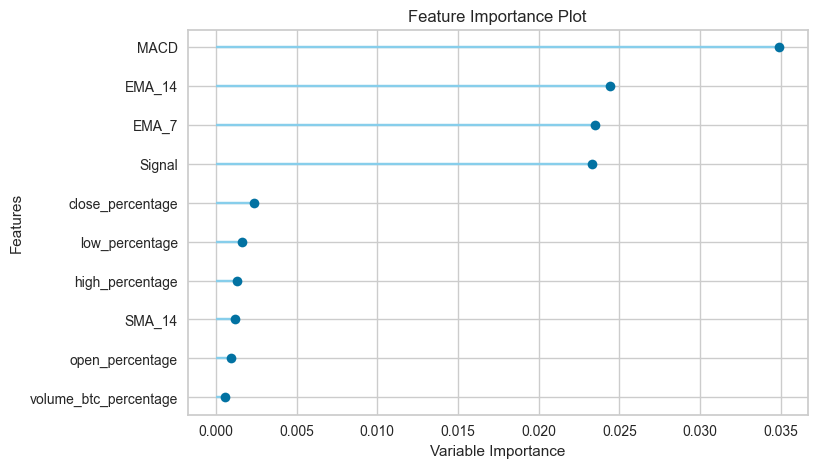

In [72]:
#plot the predictions
plot_model(dt_model, plot = 'feature')


Final Balance: 89.37295545892044
Profit: -10.627044541079556
101.59840799903853 0.0
Balance Array: [  0.           0.         100.2434024  100.2434024  100.2434024
 100.2434024    0.2434024    0.         100.59127177 100.59127177
 100.59127177 100.59127177 100.59127177 100.59127177 100.59127177
 100.59127177 100.59127177 100.59127177 100.59127177 100.59127177
 100.59127177 100.59127177 100.59127177 100.59127177 100.59127177
 100.59127177 100.59127177 100.59127177 100.59127177 100.59127177
   0.59127177   0.           0.         101.598408   101.598408
   1.598408     0.           0.         101.24023693   1.24023693
   0.           0.           0.           0.           0.
   0.           0.           0.           0.         101.40536823
 101.40536823 101.40536823 101.40536823 101.40536823   1.40536823
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.          94.5565629   94.5565629   94.5565629   94.5565629
  94.

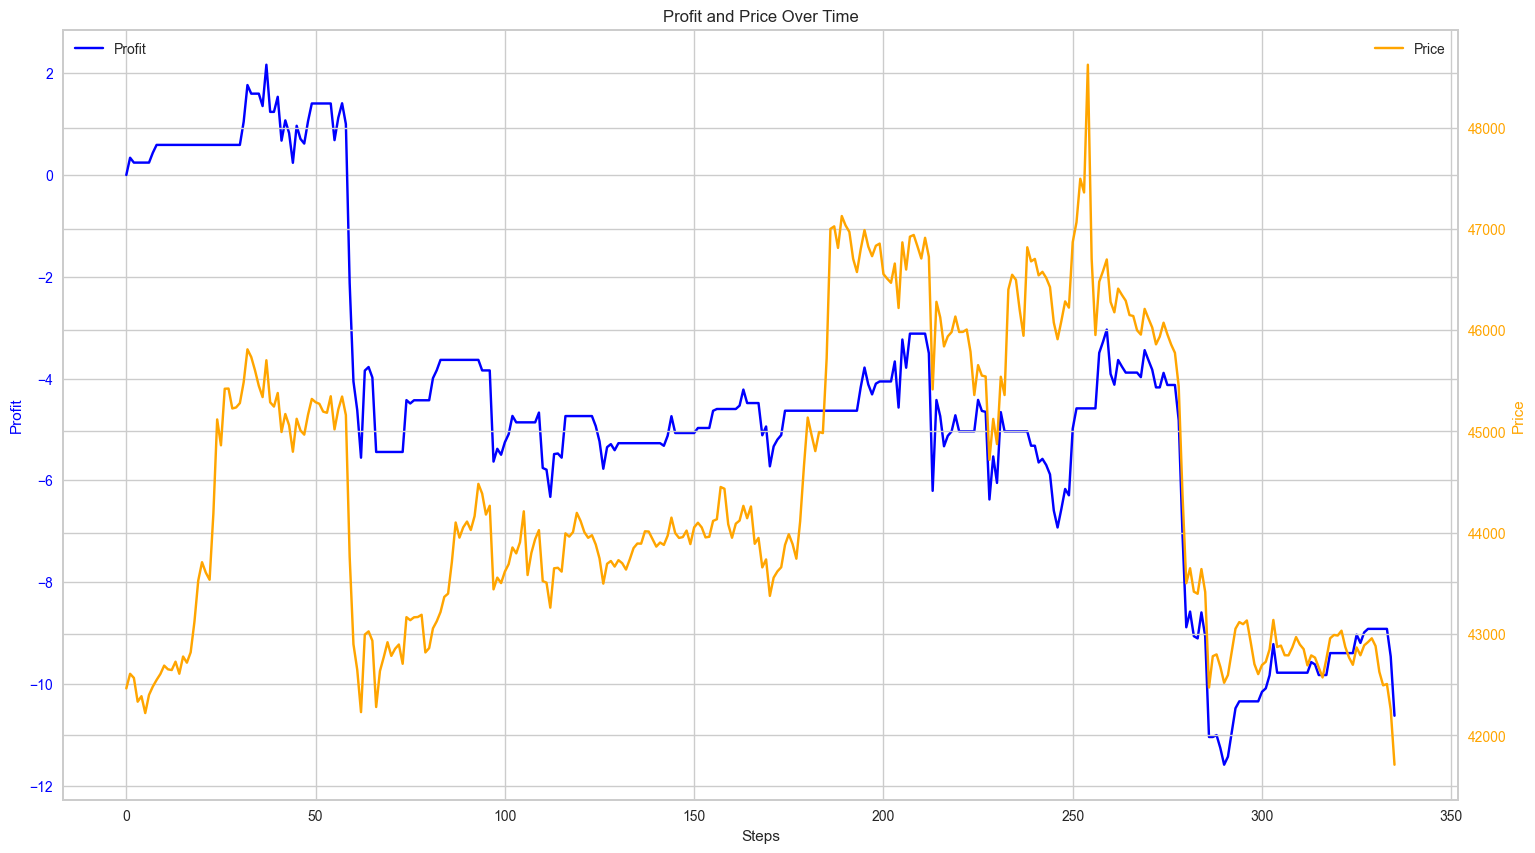

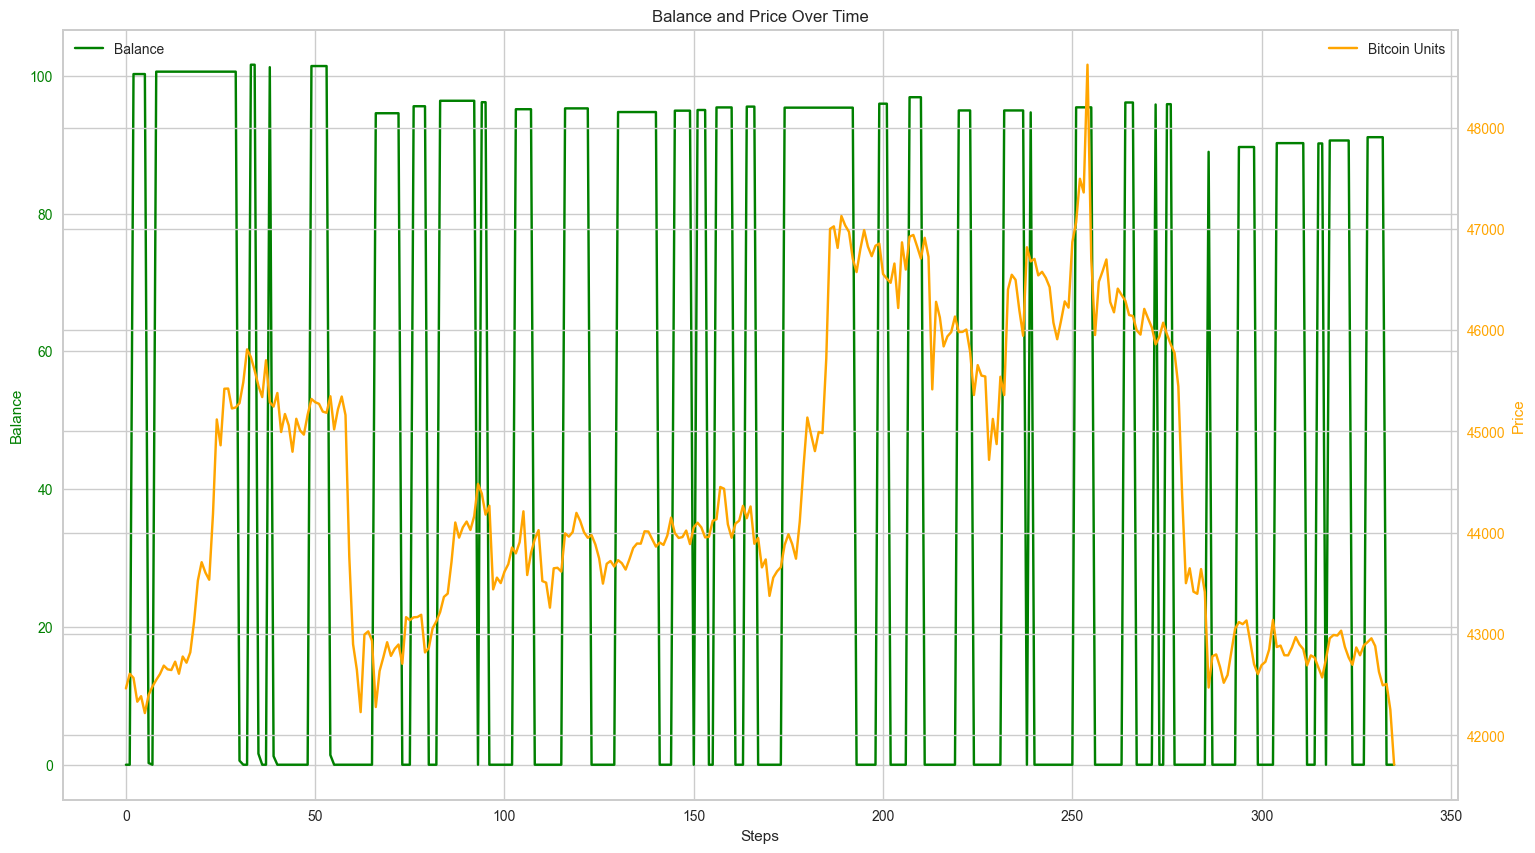

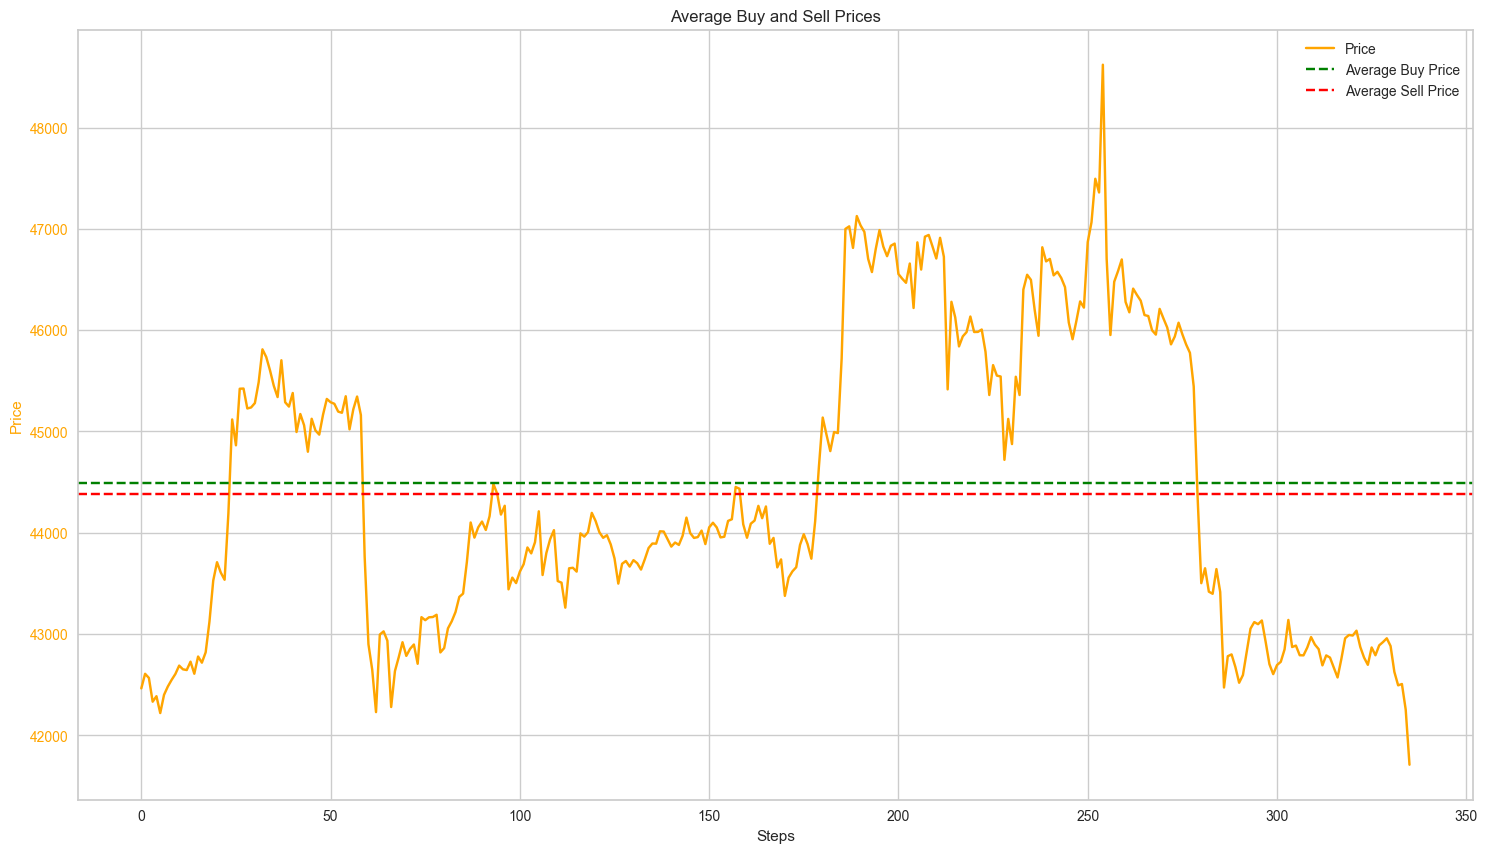

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Initialize Variables
initial_balance = 100
balance = initial_balance
bitcoin_units = 0
max_trade_amount = 100  # Maximum amount in dollars to trade when buying
transaction_fee = 0.20  # Fee per trade in dollars
total_transaction_cost = 0
prices = []
steps = []
buy_prices = []
sell_prices = []

# Lists to track balance, Bitcoin units, and profit over time
balance_over_time = []
bitcoin_units_over_time = [bitcoin_units]
profit_over_time = []  # Initial profit is 0

# Assuming 'predictions' DataFrame has a column 'Label' for predicted values
# and a column 'Price' for the corresponding Bitcoin price at that time
for index, row in predictions.iterrows():
    price = row['close_price']
    prices.append(price)
    steps.append(index)
    prediction = row['prediction_label']
    
    if prediction == 1:  # Buy
        if balance > transaction_fee:  # Ensure there is enough balance to cover the transaction fee
            trade_amount = min(max_trade_amount, balance)  # Adjust trade amount to available balance
            units_to_buy = trade_amount / price  # Calculate units to buy for the trade amount
            bitcoin_units += units_to_buy
            balance -= trade_amount
            total_transaction_cost += transaction_fee
            buy_prices.append(price)
            # print(f"Bought {units_to_buy} BTC at {price}, new balance: {balance}, holdings: {bitcoin_units} BTC")
    
    elif prediction == 0:  # Sell
        if bitcoin_units > 0:  # Ensure there are Bitcoin units to sell
            balance += bitcoin_units * price  # Sell all current Bitcoin holdings
            total_transaction_cost += transaction_fee
            sell_prices.append(price)
            # print(f"Sold {bitcoin_units} BTC at {price}, new balance: {balance}")
            bitcoin_units = 0  # Reset holdings after selling
    
    # Update lists
    balance_over_time.append(balance)
    bitcoin_units_over_time.append(bitcoin_units)
    
    # Calculate current profit
    current_profit = (balance + (bitcoin_units * price) - initial_balance) / initial_balance * 100
    profit_over_time.append(current_profit)

    # Print prediction, price, balance, profit
    # print(f'Prediction: {prediction}, Price: {price}, Balance: {balance}, Profit: {current_profit}')

# Step 3: Calculate Final Profit
# Assuming the last price in the predictions DataFrame is the final price of Bitcoin
final_price = predictions.iloc[-1]['close_price']
final_balance = balance + (bitcoin_units * final_price)
profit = final_balance - initial_balance

print(f'Final Balance: {final_balance}')
print(f'Profit: {profit}')

# Calculate Max Drawdown
peak_value = np.max(balance_over_time)
trough_value = np.min(balance_over_time[np.argmax(balance_over_time):])
max_drawdown = (trough_value - peak_value) / peak_value
print(peak_value, trough_value)

# Calculate Sharpe Ratio
balance_array = np.array(balance_over_time)
returns = np.diff(balance_array) / balance_array[:-1]
risk_free_rate = 0.0  # Assuming a risk-free rate of 0 for simplicity
excess_returns = returns - risk_free_rate

# Debug prints to verify intermediate values
print(f"Balance Array: {balance_array}")
print(f"Returns: {returns}")
print(f"Excess Returns: {excess_returns}")
print(f"Mean Excess Return: {np.mean(excess_returns)}")
print(f"Standard Deviation of Excess Returns: {np.std(excess_returns)}")

# Ensure standard deviation is not zero to avoid division by zero
if np.std(excess_returns) != 0:
    sharpe_ratio = np.mean(excess_returns) / np.std(excess_returns) * np.sqrt(14)  # Assuming 14 trading days
else:
    sharpe_ratio = np.nan  # Set Sharpe ratio to NaN if standard deviation is zero

# Print Max Drawdown, Sharpe Ratio, and Total Transaction Cost
print(f'Max Drawdown: {max_drawdown * 100:.2f}%')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Total Transaction Cost: ${total_transaction_cost:.2f}')

# Calculate average buy and sell prices
average_buy_price = np.mean(buy_prices) if buy_prices else 0
average_sell_price = np.mean(sell_prices) if sell_prices else 0

# Plot the trading sequence
fig, ax1 = plt.subplots(figsize=(18, 10))

ax1.plot(steps, profit_over_time, label='Profit', color='blue')
ax1.set_ylabel('Profit', color='blue')
ax1.set_xlabel('Steps')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(steps, prices, label='Price', color='orange')
ax2.set_ylabel('Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

plt.title('Profit and Price Over Time')
plt.show()

fig, ax3 = plt.subplots(figsize=(18, 10))
ax3.plot(steps, balance_over_time, label='Balance', color='green')
ax3.set_ylabel('Balance', color='green')
ax3.set_xlabel('Steps')
ax3.tick_params(axis='y', labelcolor='green')
ax3.legend(loc='upper left')

ax4 = ax3.twinx()
ax4.plot(steps, prices, label='Bitcoin Units', color='orange')
ax4.set_ylabel('Price', color='orange')
ax4.tick_params(axis='y', labelcolor='orange')
ax4.legend(loc='upper right')

plt.title('Balance and Price Over Time')
plt.show()
# Plot average buy and sell prices
fig, ax5 = plt.subplots(figsize=(18, 10))

ax5.plot(steps, prices, label='Price', color='orange')
ax5.axhline(y=average_buy_price, color='green', linestyle='--', label='Average Buy Price')
ax5.axhline(y=average_sell_price, color='red', linestyle='--', label='Average Sell Price')
ax5.set_ylabel('Price', color='orange')
ax5.set_xlabel('Steps')
ax5.tick_params(axis='y', labelcolor='orange')
ax5.legend(loc='upper right')

plt.title('Average Buy and Sell Prices')
plt.show()

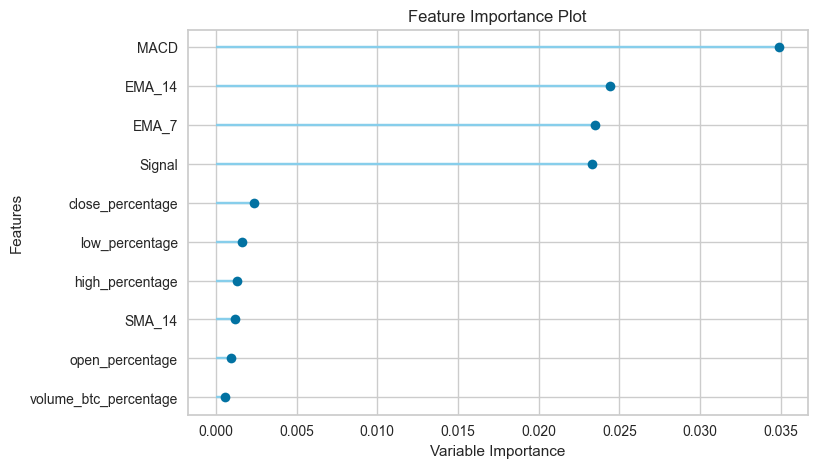

In [75]:
# display feature importance
plot_model(dt_model, plot = 'feature')
